## Predicting Nationality of Individuals Using their Names with ML
+ Steps
    - a dataset of firstnames 
    - a dataset of lastnames
    

In [1]:
## Load EDA
import pandas as pd
import numpy as np

In [2]:
# Load ML Pkgs
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
# Load Dataset
df = pd.read_csv("Names_Dataset.csv")

In [4]:
df.shape

(3238, 3)

In [5]:
df.head()

,Unnamed: 0,names,nationality
0,0,Gershon,yiddish
1,1,Lantz,yiddish
2,2,Zaide,yiddish
3,3,Zalman,yiddish
4,4,Zindel,yiddish


In [6]:
df.columns

Index(['Unnamed: 0', 'names', 'nationality'], dtype='object')

In [7]:
df['nationality'].unique()

array(['yiddish', 'gaelic', 'african', 'irish', 'hungarian', 'german',
       'swedish', 'japanese', 'italian', 'american', 'hawaiian', 'greek',
       'polynesian', 'scandinavian', 'spanish', 'celtic', 'old-english',
       'korean', 'sanskrit', 'african-american', 'hebrew', 'norse',
       'chinese', 'finnish', 'persian', 'scottish', 'slavic', 'english',
       'old-norse', 'dutch', 'armenian', 'welsh', 'polish', 'teutonic',
       'russian', 'egyptian', 'arabic', 'swahili', 'native-american',
       'old-french', 'french', 'middle-english', 'latin', 'vietnamese',
       'danish', 'hindi', 'old-german', 'turkish', 'indian',
       'czechoslovakian'], dtype=object)

In [8]:
class_names = ['yiddish', 'gaelic', 'african', 'irish', 'hungarian', 'german',
       'swedish', 'japanese', 'italian', 'american', 'hawaiian', 'greek',
       'polynesian', 'scandinavian', 'spanish', 'celtic', 'old-english',
       'korean', 'sanskrit', 'african-american', 'hebrew', 'norse',
       'chinese', 'finnish', 'persian', 'scottish', 'slavic', 'english',
       'old-norse', 'dutch', 'armenian', 'welsh', 'polish', 'teutonic',
       'russian', 'egyptian', 'arabic', 'swahili', 'native-american',
       'old-french', 'french', 'middle-english', 'latin', 'vietnamese',
       'danish', 'hindi', 'old-german', 'turkish', 'indian',
       'czechoslovakian']

In [9]:
len(class_names)

50

In [10]:
df.groupby('nationality')['names'].size()

nationality
african             100
african-american    100
american            100
arabic              100
armenian             17
celtic               62
chinese             100
czechoslovakian      38
danish               11
dutch                24
egyptian             30
english             100
finnish              13
french              100
gaelic               87
german              100
greek               100
hawaiian            100
hebrew              100
hindi               100
hungarian            64
indian               25
irish               100
italian             100
japanese            100
korean               16
latin               100
middle-english       45
native-american     100
norse                40
old-english         100
old-french           46
old-german           40
old-norse            28
persian              55
polish               48
polynesian           15
russian              85
sanskrit             28
scandinavian        100
scottish             74
slav

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='nationality'>

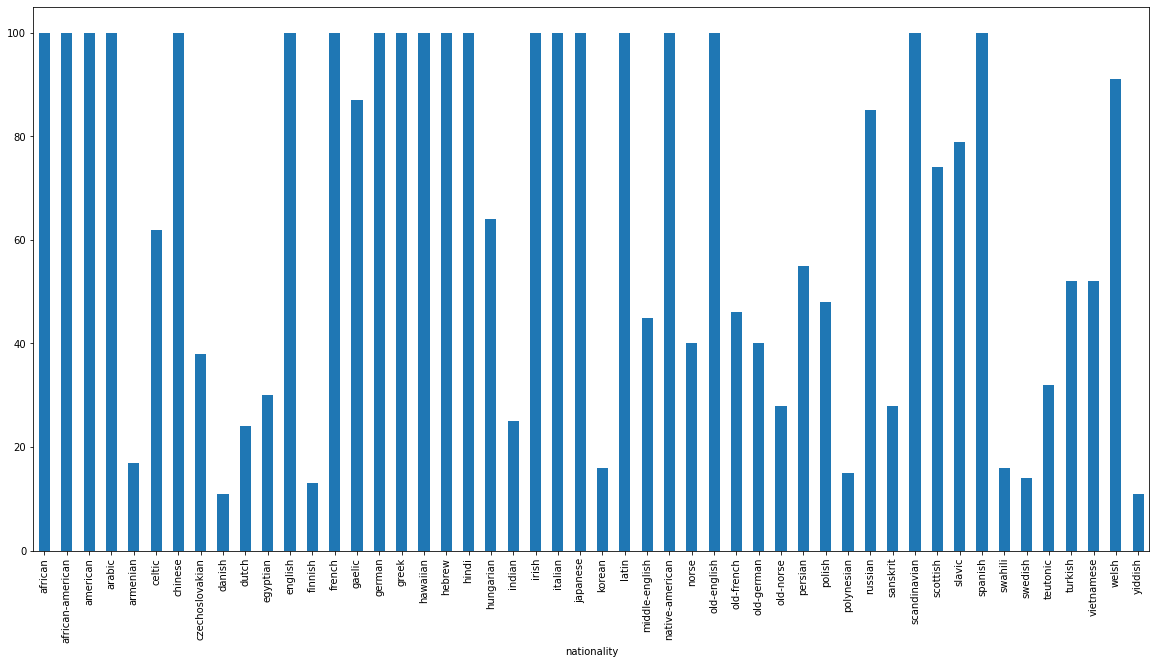

In [12]:
df.groupby('nationality')['names'].size().plot(kind='bar',figsize=(20,10))

In [13]:
# Features
Xfeatures = df['names']
ylabels= df['nationality']

In [14]:
# Vectorize Features
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [15]:
cv.get_feature_names()

C:\Users\christopher.wachira_\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aaliyah',
 'aari',
 'aaron',
 'aase',
 'aba',
 'aban',
 'abbas',
 'abbellonna',
 'abbott',
 'abby',
 'abdiel',
 'abdulaziz',
 'abel',
 'abelard',
 'abeni',
 'abeque',
 'abey',
 'abeytu',
 'abhay',
 'abhijit',
 'abhorson',
 'abia',
 'abiba',
 'abie',
 'abigail',
 'abijah',
 'abira',
 'abital',
 'abmaba',
 'abner',
 'abra',
 'abraham',
 'abrahsa',
 'abriana',
 'abril',
 'absolom',
 'abtin',
 'abuna',
 'acacio',
 'acantha',
 'ace',
 'achachak',
 'achazia',
 'achilles',
 'achuta',
 'ackley',
 'acton',
 'acura',
 'ada',
 'adahy',
 'adalai',
 'adalbert',
 'adalgisa',
 'adalgiso',
 'adalia',
 'adam',
 'adamina',
 'adan',
 'adar',
 'adara',
 'adare',
 'addai',
 'addison',
 'adelaide',
 'adelbert',
 'adelfried',
 'adelino',
 'adelmio',
 'adelmo',
 'adelpha',
 'ademaro',
 'adena',
 'adeodatus',
 'aderes',
 'adger',
 'adham',
 'adia',
 'adie',
 'adin',
 'aditya',
 'adler',
 'adley',
 'admon',
 'adney',
 'adoette',
 'adolfina',
 'adolph',
 'adon',
 'adonis',
 'adora',
 'adrian',
 'adrienne',
 'a

In [16]:
# Save Our Vectorizer
import joblib

In [17]:
nationality_vectorizer = open("nationality_vectorizer.pkl","wb")
joblib.dump(cv,nationality_vectorizer)

In [18]:
nationality_vectorizer.close()

In [19]:
# Split Dataset into Train/Test
x_train,x_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.33,random_state=42)

In [20]:
## Build Model
nv = MultinomialNB()
nv.fit(x_train,y_train)

MultinomialNB()

In [21]:
# Accuracy of Our Model
nv.score(x_test,y_test)

0.05986903648269411

In [22]:
sample1 = ["Kofi"]

In [23]:
vect1 = cv.transform(sample1).toarray()

In [24]:
nv.predict(vect1)

array(['african'], dtype='<U16')

In [25]:
sample2= ["Li","John","Ali","Vladmir"]

In [26]:
vect2 = cv.transform(sample2).toarray()

In [27]:
nv.predict(vect2)

array(['chinese', 'french', 'arabic', 'french'], dtype='<U16')

In [28]:
# Logistic Regression
logit = LogisticRegression()
logit.fit(x_train,y_train)

LogisticRegression()

In [29]:
logit.score(x_test,y_test)

0.0626753975678204

In [30]:
# Single Prediction with Logit
logit.predict(vect1)

array(['african'], dtype=object)

In [31]:
# Multiple Prediction
logit.predict(vect2)

array(['chinese', 'french', 'arabic', 'french'], dtype=object)

In [32]:
sample_3 = ["katya","natasha"]

In [33]:
vect3 = cv.transform(sample_3).toarray()

In [34]:
logit.predict(vect3)

array(['french', 'french'], dtype=object)

In [35]:
# Interpretation of Model

In [36]:
import eli5

In [37]:
class_names

['yiddish',
 'gaelic',
 'african',
 'irish',
 'hungarian',
 'german',
 'swedish',
 'japanese',
 'italian',
 'american',
 'hawaiian',
 'greek',
 'polynesian',
 'scandinavian',
 'spanish',
 'celtic',
 'old-english',
 'korean',
 'sanskrit',
 'african-american',
 'hebrew',
 'norse',
 'chinese',
 'finnish',
 'persian',
 'scottish',
 'slavic',
 'english',
 'old-norse',
 'dutch',
 'armenian',
 'welsh',
 'polish',
 'teutonic',
 'russian',
 'egyptian',
 'arabic',
 'swahili',
 'native-american',
 'old-french',
 'french',
 'middle-english',
 'latin',
 'vietnamese',
 'danish',
 'hindi',
 'old-german',
 'turkish',
 'indian',
 'czechoslovakian']

In [38]:
# Show the weights
eli5.show_weights(logit,target_names=class_names )

In [39]:
feature_names = cv.get_feature_names()

C:\Users\christopher.wachira_\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [40]:
eli5.show_weights(logit,feature_names=feature_names,target_names=class_names )

In [41]:
# Single Pred Explanation
ex1 = np.reshape(vect1,-1,1)

TypeError: order must be str, not int

In [ ]:
eli5.show_prediction(logit,ex1,target_names=class_names,feature_names=feature_names)

In [ ]:
# Save Our Model
import joblib

In [ ]:
nationality_nv_model = open("nationality_nv_model.pkl","wb")
joblib.dump(nv,nationality_nv_model)


In [ ]:
nationality_nv_model.close()

In [ ]:
nationality_logit_model = open("nationality_logit_model.pkl","wb")
joblib.dump(nv,nationality_logit_model)


In [ ]:
nationality_logit_model.close()